In [44]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../src/')
from evaluate import get_results

In [2]:
# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
# sweep_id = "cnpdtv5t"
sweep_id = 'zt4xeuwa'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


In [3]:
run_id = 'oeud5m9d'
run_ids.append(run_id)

In [4]:
sweep_id = '4fvcno8c'
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
for run in sweep.runs:
    run_ids.append(run.id)

In [5]:
sweep_id = 'nbcoi2jr'
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
for run in sweep.runs:
    run_ids.append(run.id)

In [6]:
res_list = []
for run_id in run_ids:
    run = api.run(f"{entity}/{project}/{run_id}")
    res, plots, cfg = get_results(run)
    res_list.append(
        dict(
            run_id=run_id,
            res=res,
            plots=plots,
            cfg=cfg
        )
    )

No checkpoint found for run wmrzxa1e


In [10]:
res_list

[{'run_id': '86if7up3',
  'res': {'data': 'sea_ad_gaba',
   'preprocess': 'kernel',
   'kernel': 'alpha_decaying',
   'dist_recon_weight': [0.9, 0.1, 0],
   'model_type': 'ae',
   'dist_mape_test_test': 0.5909148003819402,
   'dist_mape_test_train': 0.5784365455993569,
   'dist_mape_test_overall': 0.5809321965558728,
   'dist_rmse_test_test': 0.011688825927118012,
   'dist_rmse_test_train': 0.011743601363322627,
   'test_rmse': 0.005956174374369757},
  'plots': {'phate_true': array([[ 0.01674412,  0.01024003],
          [-0.01055841,  0.01849427],
          [ 0.01389855,  0.01333599],
          ...,
          [-0.01832494, -0.01344009],
          [-0.02056115, -0.00634377],
          [-0.01919617,  0.00686106]]),
   'phate_pred': array([[ 0.01269743,  0.00871002],
          [-0.01434578,  0.02913242],
          [ 0.01332693,  0.00610352],
          ...,
          [-0.0109965 , -0.00968559],
          [-0.00605927, -0.00732275],
          [-0.01518323,  0.0119198 ]]),
   'colors': array

In [12]:
res_list[0]['cfg']

{'data': {'name': 'sea_ad_gaba', 'root': '../data', 'kernel': {'type': 'alpha_decaying', 'alpha': 10, 'sigma': 1, 'epsilon': 1, 'use_std': True}, 'filetype': '.npz', 'preprocess': 'kernel'}, 'path': {'log': '', 'root': '../results/', 'save': False, 'model': 'model', 'plots': '', 'out_data': '', 'procrustes': 'procrustes'}, 'model': {'lr': 0.001, 'type': 'ae', 'log_dist': True, 'kl_weight': 0.1, 'activation': 'relu', 'layer_widths': [256, 128, 64], 'dist_reconstr_weights': [0.9, 0.1, 0], 'dist_recon_topk_coords': 0}, 'logger': {'tags': ['default'], 'entity': 'xingzhis', 'project': 'dmae', 'use_wandb': True}, 'model.lr': 0.001, 'training': {'seed': 42, 'monitor': 'val_loss', 'shuffle': True, 'patience': 10, 'batch_size': 1024, 'max_epochs': 50, 'accelerator': 'cuda', 'match_potential': True, 'train_test_split': 0.8, 'log_every_n_steps': 100, 'train_valid_split': 0.8}, 'data.name': 'sea_ad_gaba', 'model.type': 'ae', 'data.preprocess': 'kernel', 'data.kernel.type': 'alpha_decaying', 'model

In [34]:
res_eb = []
for res in res_list:
    cfg = res['cfg']
    try:
        if cfg['data']['name'] == 'eb_subset' and \
            cfg['data']['preprocess'] in ['none','kernel'] and \
            cfg['model']['type'] == 'ae' and \
            cfg['model']['dist_reconstr_weights'] == [0.9,0.1,0.] and \
            cfg['training']['match_potential'] == True:
            print(res['run_id'])
            res_eb.append(res)
    except:
        pass

fpuexgus
wglcdj3d
fw1r3f4d


In [37]:
for res in res_eb:
    print(res['res']['kernel'])

gaussian
alpha_decaying
None


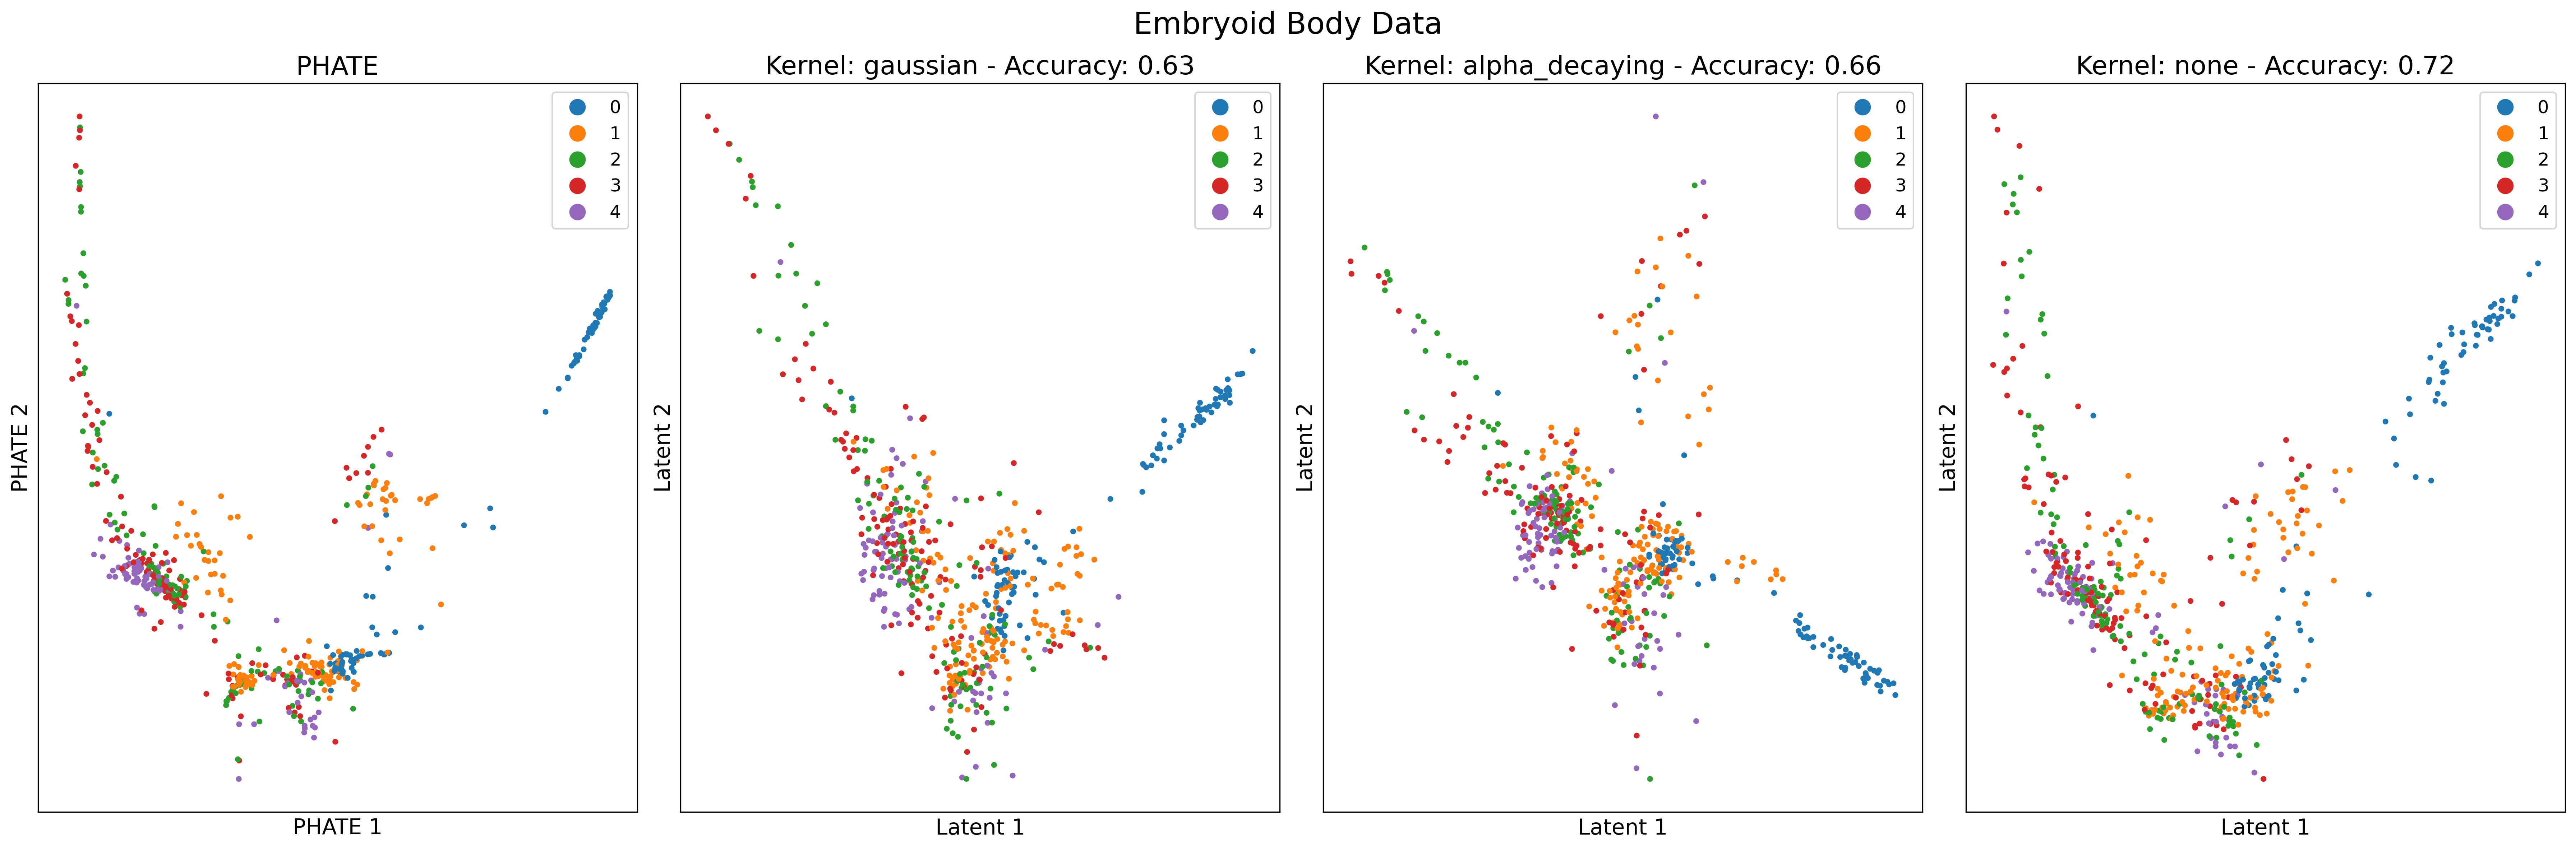

In [59]:
res_bar = []
for res in res_eb:
    preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    acc_all = 1 - res['res']['dist_mape_test_overall']
    acc_test_test = 1 - res['res']['dist_mape_test_test']
    acc_test_train = 1 - res['res']['dist_mape_test_train']
    res_bar.append(
        dict(
            preprocessing=preprocessing,
            acc_all=acc_all,
            acc_test_test=acc_test_test,
            acc_test_train=acc_test_train
        )
    )
res_bar = pd.DataFrame(res_bar)
res_plot = []
for res in res_eb:
    preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    res_plot.append(
        dict(
            preprocessing=preprocessing,
            acc_all= 1 - res['res']['dist_mape_test_overall'],
            plots=res['plots']
        )
    )
fig, axes = plt.subplots(1, 4, figsize=(24, 8), dpi=300)  # Modify the number of subplots to 3, adjust the figsize, and set dpi to 300

res = res_plot[0]
scprep.plot.scatter2d(res['plots']['phate_true'], c=res['plots']['colors'], ax=axes[0], ticks=False, label_prefix="PHATE ", title='PHATE')

for i in range(3):
    ax = axes[i+1]
    res = res_plot[i]
    scprep.plot.scatter2d(res['plots']['phate_pred'], c=res['plots']['colors'], ax=axes[i+1], ticks=False, label_prefix="Latent ", title=f'Kernel: {res["preprocessing"]} - Accuracy: {res["acc_all"]:0.2f}')
plt.suptitle(f"Embryoid Body Data", fontsize=20)
plt.tight_layout()
plt.show()

In [60]:
res_sea_ad = []
for res in res_list:
    cfg = res['cfg']
    try:
        if cfg['data']['name'] == 'sea_ad_gaba' and \
            cfg['data']['preprocess'] in ['none','kernel'] and \
            cfg['model']['type'] == 'ae' and \
            cfg['model']['dist_reconstr_weights'] == [0.9,0.1,0.] and \
            cfg['training']['match_potential'] == True:
            print(res['run_id'])
            res_sea_ad.append(res)
    except:
        pass

86if7up3
oeud5m9d
cs8ckinu


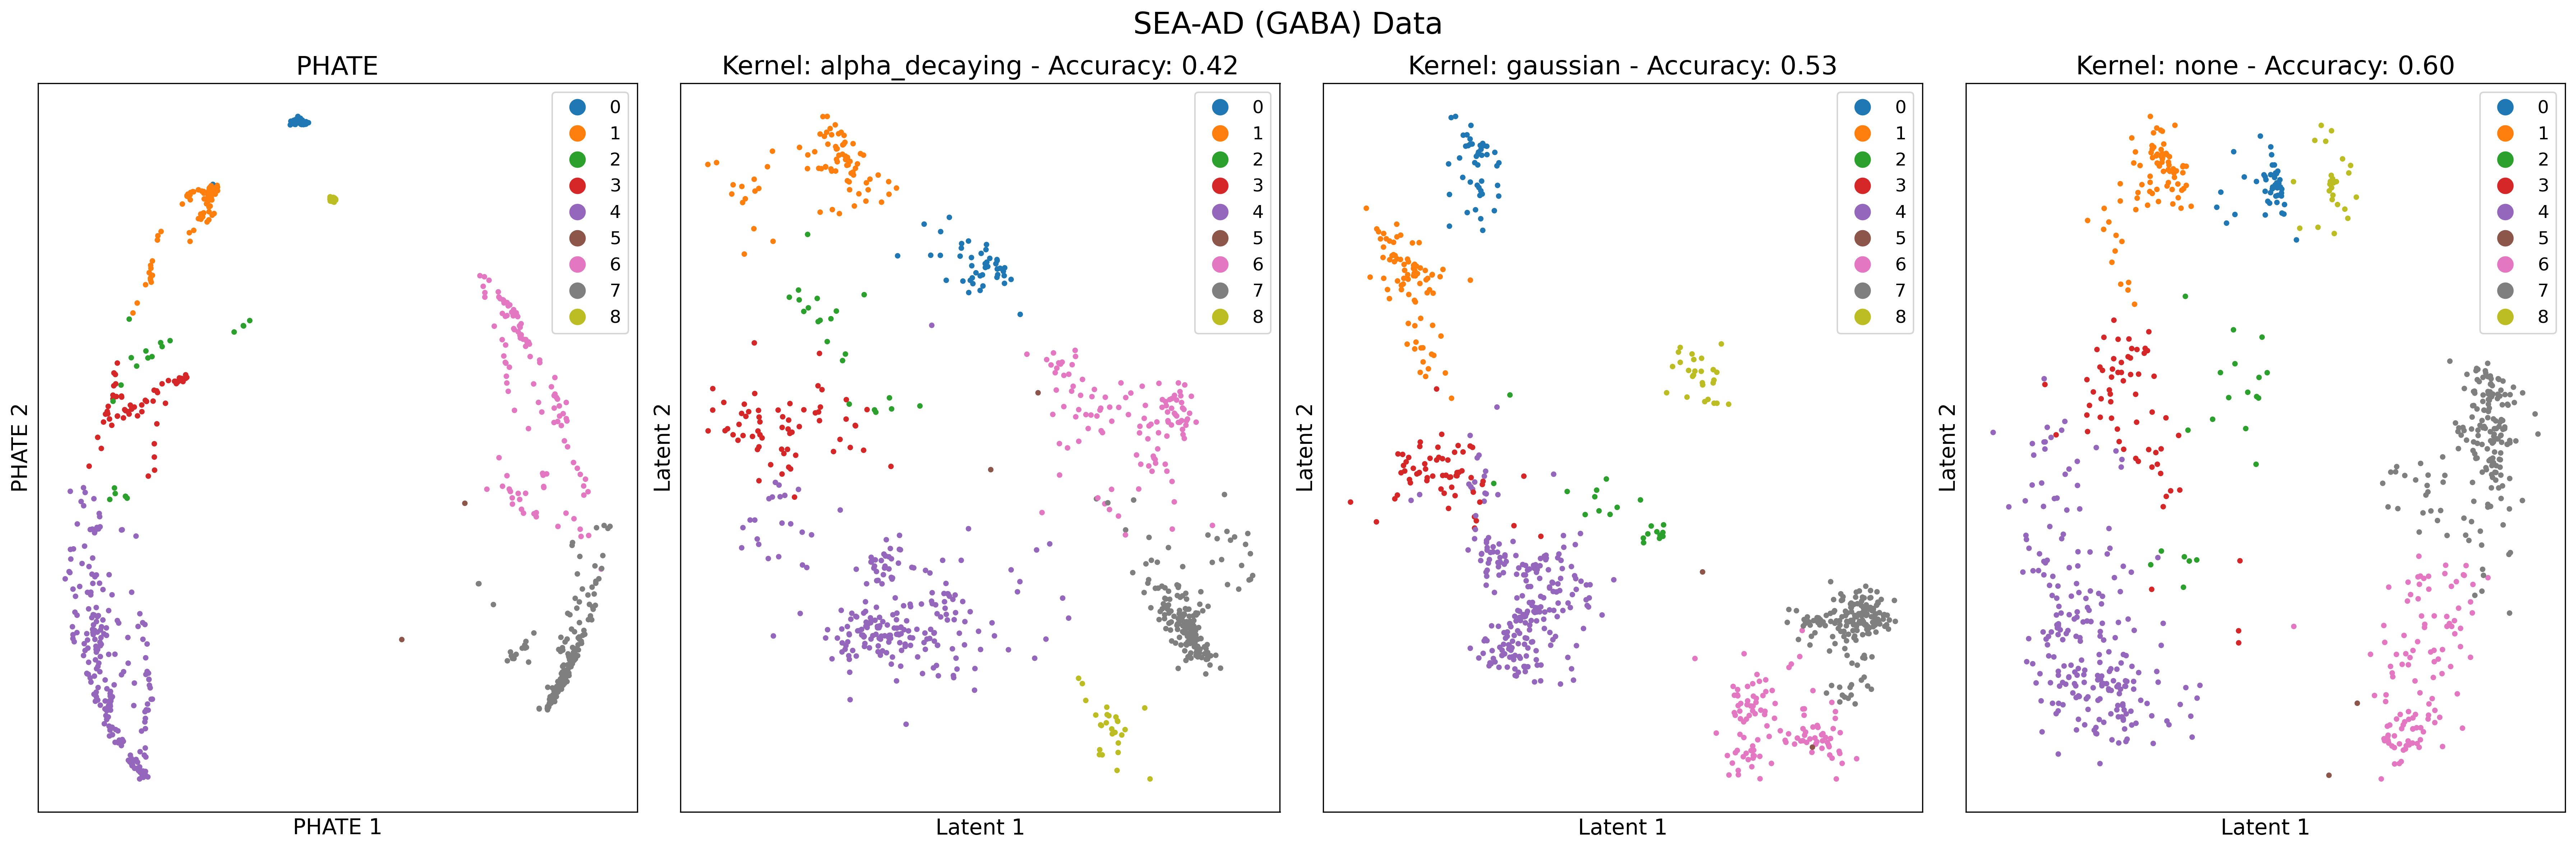

In [61]:
res_plot = []
for res in res_sea_ad:
    preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    res_plot.append(
        dict(
            preprocessing=preprocessing,
            acc_all= 1 - res['res']['dist_mape_test_overall'],
            plots=res['plots']
        )
    )
fig, axes = plt.subplots(1, 4, figsize=(24, 8), dpi=300)  # Modify the number of subplots to 3, adjust the figsize, and set dpi to 300

res = res_plot[0]
scprep.plot.scatter2d(res['plots']['phate_true'], c=res['plots']['colors'], ax=axes[0], ticks=False, label_prefix="PHATE ", title='PHATE')

for i in range(3):
    ax = axes[i+1]
    res = res_plot[i]
    scprep.plot.scatter2d(res['plots']['phate_pred'], c=res['plots']['colors'], ax=axes[i+1], ticks=False, label_prefix="Latent ", title=f'Kernel: {res["preprocessing"]} - Accuracy: {res["acc_all"]:0.2f}')
plt.suptitle(f"SEA-AD (GABA) Data", fontsize=20)
plt.tight_layout()
plt.show()